In [24]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
data = pd.read_csv("~/derived_data/hf_pred.csv")
data = data.dropna()
data

,subject_id,gender,anchor_age,language,marital_status,ethnicity,Aspirin,Statin,Loop,Insulin,Nitroglycerin,Warfarin,death
0,10000980,F,73,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,1.0,1.0,1.0,1.0,0.0,1.0,0
1,10001667,F,86,ENGLISH,DIVORCED,WHITE,0.0,1.0,0.0,1.0,0.0,0.0,0
2,10001877,M,89,ENGLISH,MARRIED,WHITE,0.0,1.0,1.0,1.0,0.0,1.0,0
3,10002013,F,53,ENGLISH,SINGLE,WHITE,1.0,1.0,1.0,1.0,1.0,0.0,0
4,10002131,F,87,ENGLISH,WIDOWED,WHITE,1.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,19994505,M,80,?,MARRIED,WHITE,1.0,1.0,1.0,1.0,0.0,0.0,1
11977,19997293,M,76,ENGLISH,SINGLE,WHITE,1.0,1.0,1.0,1.0,0.0,1.0,0
11978,19997367,F,63,ENGLISH,MARRIED,WHITE,1.0,1.0,1.0,1.0,1.0,0.0,0
11979,19997911,F,79,ENGLISH,MARRIED,WHITE,1.0,1.0,1.0,0.0,0.0,0.0,0


In [4]:
feature_cols=['gender', 'anchor_age', 'marital_status', 'ethnicity','Aspirin','Loop','Insulin','Nitroglycerin','Warfarin']
df=pd.get_dummies(data, columns=['gender', 'marital_status', 'ethnicity', 'language', 'Aspirin','Statin','Loop','Insulin','Nitroglycerin','Warfarin'])
df.drop(df.columns[[0, 4, 17, 19, 21, 23, 25, 27, 29]], axis=1, inplace=True)
order=['death','anchor_age', 'gender_F', 'marital_status_DIVORCED',
       'marital_status_MARRIED', 'marital_status_SINGLE',
       'marital_status_WIDOWED', 'ethnicity_AMERICAN INDIAN/ALASKA NATIVE',
       'ethnicity_ASIAN', 'ethnicity_BLACK/AFRICAN AMERICAN',
       'ethnicity_HISPANIC/LATINO', 'ethnicity_OTHER',
       'ethnicity_UNABLE TO OBTAIN', 'ethnicity_UNKNOWN', 'ethnicity_WHITE',
       'language_ENGLISH', 'Aspirin_1.0', 'Statin_1.0', 'Loop_1.0',
       'Insulin_1.0', 'Nitroglycerin_1.0', 'Warfarin_1.0']
df=df.reindex(columns=order)
df.columns

Index(['death', 'anchor_age', 'gender_F', 'marital_status_DIVORCED',
       'marital_status_MARRIED', 'marital_status_SINGLE',
       'marital_status_WIDOWED', 'ethnicity_AMERICAN INDIAN/ALASKA NATIVE',
       'ethnicity_ASIAN', 'ethnicity_BLACK/AFRICAN AMERICAN',
       'ethnicity_HISPANIC/LATINO', 'ethnicity_OTHER',
       'ethnicity_UNABLE TO OBTAIN', 'ethnicity_UNKNOWN', 'ethnicity_WHITE',
       'language_ENGLISH', 'Aspirin_1.0', 'Statin_1.0', 'Loop_1.0',
       'Insulin_1.0', 'Nitroglycerin_1.0', 'Warfarin_1.0'],
      dtype='object')

In [5]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [8]:
logreg = LogisticRegression(solver='lbfgs',random_state=0)
logreg.fit(X_train_minmax, y_train)

LogisticRegression(random_state=0)

In [9]:
predicted_y = logreg.predict(X_test_minmax)
print('Accuracy: {:.2f}'.format(logreg.score(X_test_minmax, y_test)))

Accuracy: 0.97


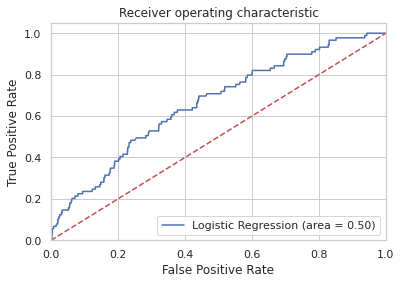

In [12]:
logit_roc_auc = roc_auc_score(y_test, predicted_y)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_minmax)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('figures/Log_ROC')
plt.show()

In [25]:
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2802
           1       0.00      0.00      0.00        89

    accuracy                           0.97      2891
   macro avg       0.48      0.50      0.49      2891
weighted avg       0.94      0.97      0.95      2891



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
